1. Importar Datos

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

solicitantes = pd.read_excel('/content/drive/MyDrive/Analítica de Negocios/0. SolicitantesCrédito.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Limpieza de Datos

In [4]:
solicitantes.shape

(8378, 35)

In [5]:
##Elimino las filas donde 'PreApr' está vacío

XD =solicitantes.dropna(subset=['PreApr'])

In [6]:
XD.shape

(5842, 35)

In [7]:
## seleccionamos solo las variables independientes del modelo
XD=XD[['Edad','Hijos','Perscargo','Estrato','Ingresos', 'Egresos', 'Monto (EAD)','Plazo','Cuota (COP)']]

In [8]:
## Escojo la variable dependiente del modelo
yd=solicitantes['PreApr'].dropna()

3. Implementación del modelo Naive Bayes

In [9]:
## Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [10]:
# Convierto los datos a arrays
XDArray = np.array(XD,dtype=float)
ydArray =np.array(yd, dtype=float)

In [11]:
## Entrenar el modelo
ModelNB = GaussianNB ()
ModelNB.fit(XDArray, ydArray)

GaussianNB()

In [12]:
## Predigo los yd
ydPred=ModelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

4. Matriz de confusión

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

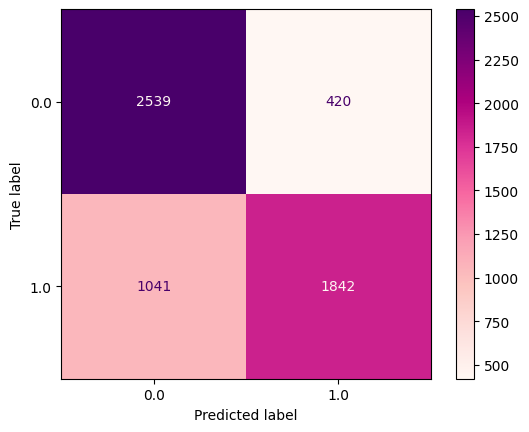

In [14]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelNB.classes_)
disp.plot(cmap='RdPu')
plt.show()

5. Métricas de exactitud del modelo

In [15]:
## Exactitud (Accuracy)
## Número de predicciones correctas sobre el total de predicciones
exactitud = (cm [1][1]+ cm [0][0])/cm.sum()

In [16]:
print (f'La exactitud (accuracy) del modelo es de {exactitud:.2%}')

La exactitud (accuracy) del modelo es de 74.99%


In [17]:
## la eaxctitud nos quiere decir que nuestro modelo ha acertado en la clasificación de 75% en comparación con el modelo de
# 4 variables que dió un valor del 76.14% sigue siendo muy acertado en las dos partes.

In [18]:
## Tasa de Error
## Número de predicciones incorrectas sobre el total de predicciones

# opción 1
error = (cm [1][0]+ cm [0][1])/cm.sum()

# opción 2
error = 1 - exactitud

print(f'El error del modelo es de {error:.2%}')

El error del modelo es de 25.01%


In [19]:
## la tasa de error sigue siendo baja, el modelo no acierta en 25% en la clasificación de los datos.

In [20]:
## Precisión
## Que tan cerca está un resultado del valor verdadero. De los que calcula como verdaderos
#cuales son efectivamente verdaderos

precisión = (cm [1][1]/(cm [1][1] + cm [0][1]))
print(f'La precisión del modelo es de {precisión:.2%}')


La precisión del modelo es de 81.43%


In [21]:
## En comparación con el modelo con cuatro variables que la precisión es de 81. 01% podemos evidenciar que con mayor variables tiene mayor porcentaje
# de precisión es del 81.43%

In [22]:
## Sensibilidad (RECALL)
## Es la cantidad de positivos bien clasificados por el modelo
# respecto al total de posotivos
sensibilidad = (cm [1][1]/(cm [1][1] + cm [1][0]))
print (f'La sensibilidad del modelo es de {sensibilidad:.2%}')

La sensibilidad del modelo es de 63.89%


In [23]:
## La sensibilidad del modelo se podría mejorar, podría ser mayor. De todos los casos positivos reales, el modelo fue capaz de
#identificar correctamente el 63.89% de ellos.


In [24]:
(cm[1][1] + cm[1][0])

2883

In [25]:
## Especificidad
## Es la cantidad de negativos bien clasificados por el modelo
# respecto al total de negativos

especificidad = (cm [0][0]/(cm [0][1] + cm [0][0]))
print (f'La especificidad del modelo es de {especificidad:.2%}')

La especificidad del modelo es de 85.81%


In [26]:
##el modelo es bastante bueno para identificar a las personas que no tienen la condición, y frente al modelo de las cuatro variables es
#mucho más alto con una diferencia del 1,22%

6. Pronóstico de la preaprobación para solicitantes nuevos

In [27]:
## Filtro los solicitantes que no tienen valor en PreApr
XDGener = solicitantes [solicitantes ['PreApr']. isna()]
XDGener.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [28]:
XDGener = XDGener[['Edad','Hijos','Perscargo','Estrato','Ingresos', 'Egresos', 'Monto (EAD)','Plazo','Cuota (COP)']]
XDGener.head()

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04


In [30]:
XDGener.shape

(2536, 9)

In [31]:
## Convierto el df a un array para poder ingresarlo al modelo GaussianNB
XDGener = np.array(XDGener,dtype=float)
XDGener

array([[3.80000000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        7.91312558e+05, 6.00000000e+01, 2.00941380e+04],
       [4.70000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.21301418e+05, 4.80000000e+01, 3.56322911e+03],
       [4.60000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        3.17445619e+06, 3.00000000e+00, 1.09005416e+06],
       ...,
       [3.20000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.01385156e+06, 3.60000000e+01, 3.66531625e+04],
       [3.50000000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        2.15623904e+06, 1.80000000e+01, 1.37580518e+05],
       [2.40000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.90927674e+06, 3.60000000e+01, 6.90249281e+04]])

In [32]:
## Solicito al modelo que me haga un pronóstico de los solicitantes que aún
# no tienen información

ydGener = ModelNB. predict(XDGener)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [33]:
len(ydGener)

2536

In [34]:
ydGenerSerie = pd. Series(ydGener, ## ingreso los valores que acabamos de predecir
                          index= solicitantes [solicitantes ['PreApr']. isna()]. index)
## le pongo los índices de los solicitantes faltantes
ydGenerSerie. head()

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0


In [35]:
solicitantes ['PreApr'].fillna(ydGenerSerie, inplace=True)
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

<ipython-input-35-4a16c2528bb6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes ['PreApr'].fillna(ydGenerSerie, inplace=True)


In [36]:
## Exportamos a la carpeta content
solicitantes.to_excel('PronosticoPreApr.xlsx')

In [38]:
## o si lo quoer exportar al drive
solicitantes.to_excel('/content/drive/MyDrive/Analítica de Negocios/PronosticoPreApr.xlsx')

7. Determinar el número de registros por cada de las categorias de preaprobación

In [39]:
ModelNB.class_prior_ ## me indica que el 50, 65% de los casos fueron negados y el 49,34% fueron aprobados

array([0.50650462, 0.49349538])

In [40]:
ModelNB.class_count_ ## Indica cuantos casos negados y cuantos aprobados

array([2959., 2883.])

In [41]:
ModelNB.theta_ ## Son las medidas del modelo (deben ser las mismas calculadas en excel)

array([[4.09841163e+01, 1.09226090e+00, 8.70226428e-01, 2.66339980e+00,
        1.72570723e+06, 1.80697480e+06, 1.30236507e+06, 3.22903008e+01,
        7.59838492e+04],
       [4.11075269e+01, 1.05584461e+00, 8.22754076e-01, 3.17030871e+00,
        4.11995789e+06, 4.05086905e+06, 3.51540952e+06, 3.28387097e+01,
        1.94971428e+05]])

In [42]:
## Calculamos las desviaciones

filas_0 =np. where(ydArray ==0)
filas_1 =np. where(ydArray ==1)

In [43]:
desvest_0 =np.sqrt(np.var(XDArray[filas_0], axis=0))
desvest_0

array([1.22130221e+01, 1.24327359e+00, 1.04384563e+00, 8.95474371e-01,
       1.30319166e+06, 1.54247787e+06, 1.06181026e+06, 1.26987828e+01,
       1.33962404e+05])

In [44]:
desvest_1 =np.sqrt(np.var(XDArray[filas_1], axis=0))
desvest_1

array([1.22510544e+01, 1.22070373e+00, 9.97817134e-01, 1.00663398e+00,
       1.88973371e+06, 2.36445020e+06, 2.11455171e+06, 1.27223614e+01,
       2.92416070e+05])

Conclusión y pequeño analísis: El modelo tiene una exactitud del 75%, una precisión del 81% y una sensibilidad del 64%. Esto significa que predice correctamente el resultado para 3 de cada 4 solicitantes, y cuando predice una preaprobación, tiene una alta probabilidad de estar en lo correcto. Sin embargo, podría tener dificultades para identificar a todos los solicitantes que realmente serán preaprobados.